In [43]:
#importing libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')

In [109]:
from imblearn.pipeline import make_pipeline 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [122]:
df = pd.read_csv('creditcard.csv')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [124]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-1.83e-02,2.78e-01,-0.11,0.07,0.13,-0.19,1.34e-01,-0.02,149.62,0
1,0.0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-2.26e-01,-6.39e-01,0.10,-0.34,0.17,0.13,-8.98e-03,0.01,2.69,0
2,1.0,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,2.48e-01,7.72e-01,0.91,-0.69,-0.33,-0.14,-5.54e-02,-0.06,378.66,0
3,1.0,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-1.08e-01,5.27e-03,-0.19,-1.18,0.65,-0.22,6.27e-02,0.06,123.50,0
4,2.0,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-9.43e-03,7.98e-01,-0.14,0.14,-0.21,0.50,2.19e-01,0.22,69.99,0


In [125]:
df.shape

(284807, 31)

The dataset has 284807 observations and 31 columns with the dependent variable named as "Class". Column "Amount" represents the transaction amount.
- 0 = Legitimate Transaction
- 1 = Fraudulent Transaction

Apparently, we do not need to transform the data as most of the variables are already standardized. 

## Checking the distribution of data

In [126]:
pd.set_option('precision', 2)
df[['Time','Amount']].describe()

,Time,Amount
count,284807.00,284807.00
mean,94813.86,88.35
std,47488.15,250.12
min,0.00,0.00
25%,54201.50,5.60
50%,84692.00,22.00
75%,139320.50,77.16
max,172792.00,25691.16


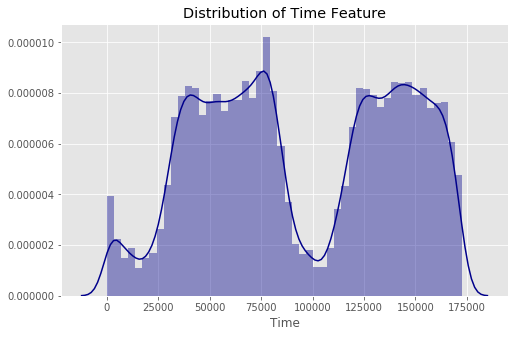

In [128]:
#visualizations of time and amount
plt.figure(figsize=(8,5))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time, color = 'darkblue')

<Figure size 720x576 with 0 Axes>

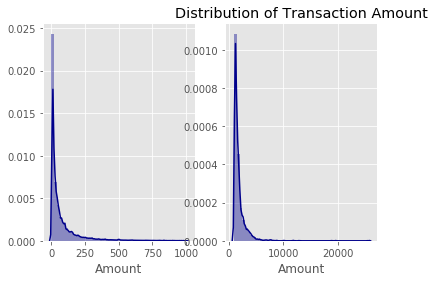

In [10]:
#visualizations of amount
plt.figure(figsize=(10,8))
fig,axes=plt.subplots(1,2)
plt.title('Distribution of Transaction Amount')
plt.grid(True)
sns.distplot(df[df.Amount<1000].Amount, color = 'darkblue',ax=axes[0])
sns.distplot(df[df.Amount>1000].Amount, color = 'darkblue',ax=axes[1])
plt.show()

## Checking whether the dataset is imbalanced

In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

As can be seen, following are the count of transactions in both the classes
- Legitimate = 284315
- Fraudulent = 432

This shows that the dataset is highly imbalanced. Applying machine learning algorithms on this dataset will result in faulty conclusions. Thus, we should first balance the dataset using one of the following approaches

- Undersampling the majority class
- Over Sampling the minority class
- SMOTE

We will apply these methods but we will also check the predictions on the raw data.

## Scaling of time and amount features in the dataset

As can be seen from the dataset, all the features except time and amount are featured and also it looks like PCA is performed on them. Thus, before moving ahead, let us first stadardize these two features.

In [12]:
from sklearn.preprocessing import RobustScaler

robscale = RobustScaler()
std_time = robscale.fit_transform(df['Time'].values.reshape(-1,1))
std_amount = robscale.fit_transform(df['Amount'].values.reshape(-1,1))
df.insert(0, 'scaled_amount', std_amount)
df.insert(1, 'scaled_time', std_time)
df.drop(['Time','Amount'], axis=1, inplace=True)

In [13]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.78,-0.99,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,...,0.25,-1.83e-02,2.78e-01,-0.11,0.07,0.13,-0.19,1.34e-01,-0.02,0
1,-0.27,-0.99,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,...,-0.07,-2.26e-01,-6.39e-01,0.10,-0.34,0.17,0.13,-8.98e-03,0.01,0
2,4.98,-0.99,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,...,0.52,2.48e-01,7.72e-01,0.91,-0.69,-0.33,-0.14,-5.54e-02,-0.06,0
3,1.42,-0.99,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,...,-0.21,-1.08e-01,5.27e-03,-0.19,-1.18,0.65,-0.22,6.27e-02,0.06,0
4,0.67,-0.99,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,...,0.41,-9.43e-03,7.98e-01,-0.14,0.14,-0.21,0.50,2.19e-01,0.22,0


## Sampling - Train Test

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit


X = df.drop('Class', axis=1)
y = df['Class']

cv = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in cv.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    raw_Xtrain, raw_Xtest = X.iloc[train_index], X.iloc[test_index]
    raw_ytrain, raw_ytest = y.iloc[train_index], y.iloc[test_index]

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]


In [15]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(raw_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(raw_ytest, return_counts=True)
print('-' * 100)

print('Class Distributions: \n')
print(train_counts_label/ len(raw_ytrain))
print(test_counts_label/ len(raw_ytest))

----------------------------------------------------------------------------------------------------
Class Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


## Balancing the imbalanced dataset

As can be seen that 99% of observations belong to majority class in both the train and test datasets. Thus, we need to first balance it. We will be using two different type of sampling
- Random Undersampling
- SMOTE (Over sampling)

In undersampling, dataset will loose a mojor chunk of information as right now the majority class has more than 99% of the observations which will eventually be reduced down so that we have 50% observations of each of the classes. Thus, undersampling could be risky. However, we will still perform undersampling and compare it against SMOTE data.

In [16]:
#Shuffling
df.sample(frac=1)

# Undersampling the majority class equal to the number of observations of the minorty class which is 492
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492] 

#Concatinating results
df_under = pd.concat([fraud,non_fraud])

# Shuffling the data before Undersampling or oversampling
df_under = df_under.sample(frac=1, random_state=42)

df_under.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
121,-0.18,-9.94e-01,-0.43,0.75,1.76,-0.17,0.06,-0.21,0.65,0.07,...,0.05,-0.20,-0.43,0.01,0.16,-0.40,0.05,1.03e-01,-0.12,0
248296,-0.31,8.13e-01,-0.61,3.70,-5.53,5.62,1.65,-2.34,-0.91,0.71,...,0.35,0.32,-0.47,-0.08,-0.67,-0.64,0.07,4.88e-01,0.29,1
239,-0.03,-9.93e-01,1.17,0.47,0.01,1.26,0.12,-0.87,0.55,-0.28,...,-0.12,0.07,0.28,-0.10,0.43,0.74,-0.27,8.47e-03,0.02,0
239501,3.01,7.69e-01,-6.68,-2.71,-5.77,1.45,-0.66,-1.15,0.85,0.43,...,-1.93,0.22,1.19,0.34,0.22,0.80,0.04,-5.50e-02,0.08,1
143336,3.23,6.97e-03,-6.71,3.92,-9.75,5.15,-5.15,-2.10,-5.94,3.58,...,0.14,0.95,-0.45,0.13,-0.34,0.39,1.08,1.65e+00,-0.39,1


Class Distribution of Undersampled Data
1    0.5
0    0.5
Name: Class, dtype: float64


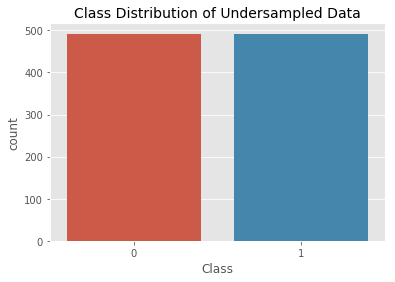

In [17]:
print('Class Distribution of Undersampled Data')
print(df_under['Class'].value_counts()/len(df_under))

sns.countplot('Class', data=df_under)
plt.title('Class Distribution of Undersampled Data', fontsize=14)
plt.show()

## Finding Correlations
The darker will be the color, more will be the correlation of that variable with the target variable. 
Higher the value of negative correlation coefficient, the more likely it will be a fraudulent transaction. 

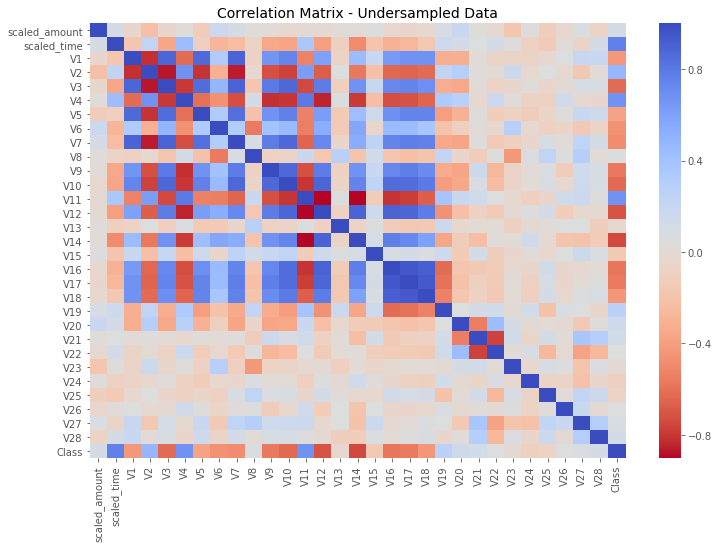

In [18]:
# Make sure we use the subsample in our correlation
plt.figure(figsize=(12,8))
sub_sample_corr = df_under.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
plt.title('Correlation Matrix - Undersampled Data', fontsize=14)
plt.show()

In [19]:
#Positive
Positive = [
'scaled_time',
'V4',
'V11',
'V2']

#Negative
Negative = [
'V14',
'V12',
'V3',
'V10']

All = ['scaled_time',
'V4',
'V11',
'V2',
'V14',
'V12',
'V3',
'V10']

In [20]:
def box_plot(data, feature):
    f, axes = plt.subplots(ncols=4, figsize=(20,4))
    for idx, val in enumerate(feature):
        sns.boxplot(x = 'Class', y=val, data = data, ax = axes[idx])
        axes[idx].set_title('{} vs Class Correlation'.format(val))
    plt.show()

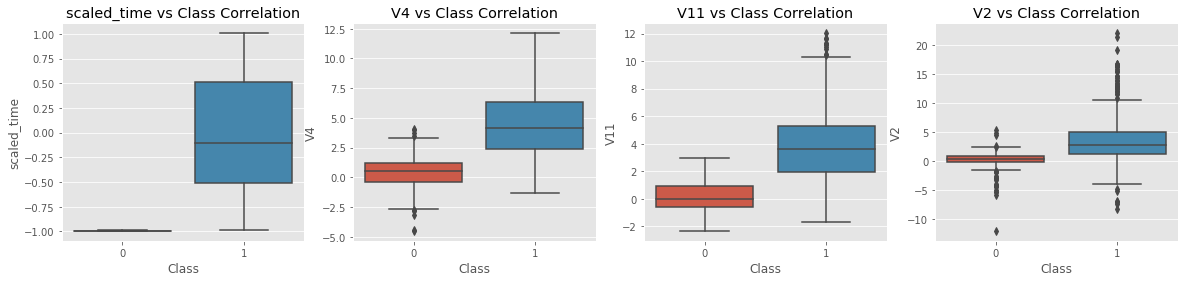

In [21]:
box_plot(df_under, Positive)

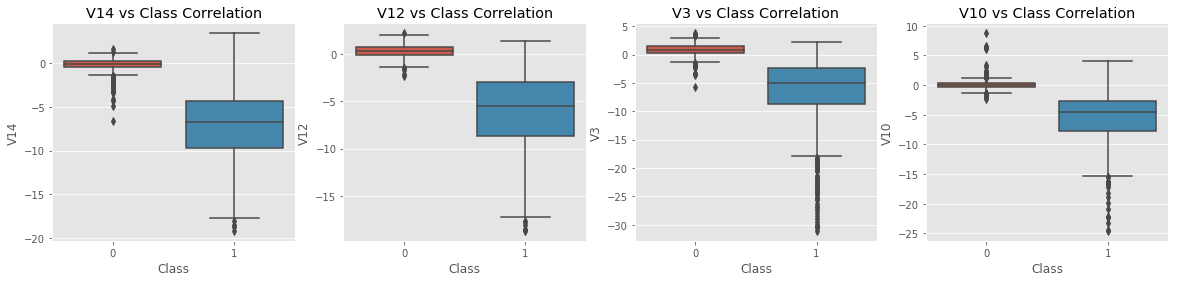

In [22]:
box_plot(df_under, Negative)

As can be seen from the box plots, except 'scaled_time' every other features have outliers and it is a good practice to eliminate the outliers. Any observations lying above 75 percentile or below 25 percentile are considered outlier. However, we will not directly remove the these outliers, we will set a threshold a little above these boundary ranges and then remove the outliers so that we are not losing necessary information that an outlier can give.

In this case, let us keep the threshold as 1.5 times the inter-quartile range. 

In [23]:
under = df_under

In [24]:
def detect_outliers(data, feat_list):
    for i in feat_list:
        print('\n{}:'.format(i))
        val = data['{}'.format(i)].loc[data['Class']==1].values
        q25, q75 = np.percentile(val, 25), np.percentile(val, 75)
        print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
        iqr = q75 - q25
        print('iqr: {}'.format(iqr))
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        print('{} Cut Off: {}'.format(i, cut_off))
        print('{} Lower Limit: {}'.format(i, lower))
        print('{} Upper Limit: {}'.format(i, upper))
        outliers = [x for x in val if x < lower or x > upper]
        print('Feature {} Outliers for Fraud Cases: {}'.format(i,len(outliers)))
        print('{} outliers:{}'.format(i,outliers),'\n --------------')
        print(data[(data[i] > upper) | (data[i] < lower)].index)
        data = data[(data[i] < upper) & (data[i] > lower)]
    return data

In [25]:
undersample = detect_outliers(under, All)


scaled_time:
Quartile 25: -0.5104676981637473 | Quartile 75: 0.5144679801219469
iqr: 1.0249356782856942
scaled_time Cut Off: 1.5374035174285412
scaled_time Lower Limit: -2.0478712155922887
scaled_time Upper Limit: 2.051871497550488
Feature scaled_time Outliers for Fraud Cases: 0
scaled_time outliers:[] 
 --------------
Int64Index([], dtype='int64')

V4:
Quartile 25: 2.373049531845565 | Quartile 75: 6.348729456714095
iqr: 3.9756799248685297
V4 Cut Off: 5.963519887302795
V4 Lower Limit: -3.5904703554572297
V4 Upper Limit: 12.31224934401689
Feature V4 Outliers for Fraud Cases: 0
V4 outliers:[] 
 --------------
Int64Index([83, 351], dtype='int64')

V11:
Quartile 25: 1.973396660607005 | Quartile 75: 5.307077600096335
iqr: 3.33368093948933
V11 Cut Off: 5.000521409233995
V11 Lower Limit: -3.0271247486269903
V11 Upper Limit: 10.30759900933033
Feature V11 Outliers for Fraud Cases: 10
V11 outliers:[11.6692047358121, 12.018913181619899, 11.6197234753825, 11.0270590938161, 10.5452629545898, 11.15

In [26]:
print(len(df_under))
print(len(undersample))


984
843


In [27]:
undersample[All].describe()

,scaled_time,V4,V11,V2,V14,V12,V3,V10
count,843.00,843.00,843.00,843.00,843.00,843.00,843.00,843.00
mean,-0.54,1.74,1.33,1.02,-2.69,-1.82,-1.17,-1.57
std,0.64,2.25,2.08,1.61,3.75,3.15,3.05,2.46
min,-0.99,-3.15,-2.33,-3.94,-14.27,-11.35,-12.90,-9.33
25%,-0.99,0.18,-0.32,0.05,-5.20,-3.77,-3.38,-3.23
50%,-0.99,1.19,0.97,0.75,-0.59,-0.28,0.09,-0.40
75%,-0.16,3.05,2.65,1.80,0.05,0.43,1.06,0.06
max,1.01,8.43,7.86,7.37,3.44,2.15,3.77,3.01


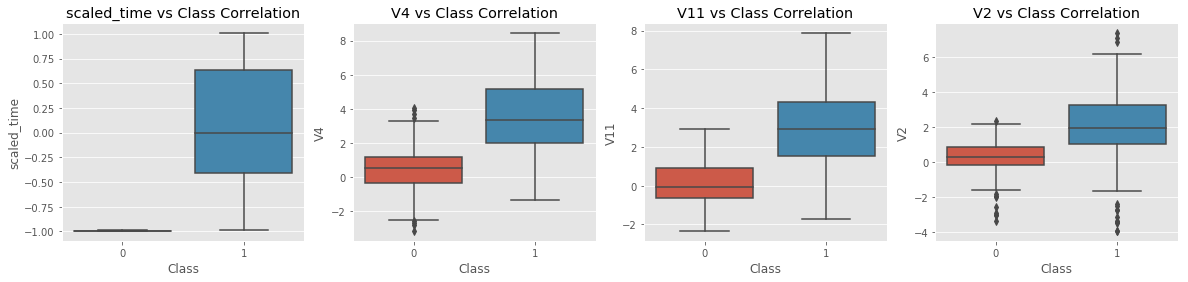

In [28]:
box_plot(undersample, Positive)

In [29]:
# Undersampling before cross validating (prone to overfit)
def dataset_X(data):
    xx = data.drop('Class', axis=1)
    return xx

def dataset_y(data):
    yy = data['Class']
    return yy

In [54]:
X = dataset_X(undersample)
y = dataset_y(undersample)

In [31]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

## Building Prediction Function

In [87]:
tn, fp, fn, tp = 0, 0, 0, 0
Accuracy = 0
y_pred = []
cm = []

def prediction(Model, Xtest_data, ytest_data):
    y_pred = Model.predict(Xtest_data)
    cm = confusion_matrix(ytest_data, y_pred)
    print('Confusion Matrix: \n{}\n'.format(cm))
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Negatives: ",tn)
    print("False Positives: ",fp)
    print("False Negatives: ",fn)
    print("True Positives: ",tp)
    
    Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
    print('---' * 40)
    print('Recall Score: {:.2f}'.format(recall_score(ytest_data, y_pred)))
    print('Precision Score: {:.2f}'.format(precision_score(ytest_data, y_pred)))
    print('F1 Score: {:.2f}'.format(f1_score(ytest_data, y_pred)))
    print('Accuracy Score: {:.2f}'.format(accuracy_score(ytest_data, y_pred)))
    print('---' * 40)
    return print("\nAccuracy of the model in predicting fraud is {}%".format(Accuracy))

## K Nearest Neighbor Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [88]:
prediction(classifier, X_test, y_test)

Confusion Matrix: 
[[99  0]
 [ 0 70]]

True Negatives:  99
False Positives:  0
False Negatives:  0
True Positives:  70
------------------------------------------------------------------------------------------------------------------------
Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00
------------------------------------------------------------------------------------------------------------------------

Accuracy of the model in predicting fraud is 100.0%


## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
glm = LogisticRegression(random_state = 0)
glm.fit(X_train, y_train)

C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [89]:
prediction(glm, X_test, y_test)

Confusion Matrix: 
[[98  1]
 [ 1 69]]

True Negatives:  98
False Positives:  1
False Negatives:  1
True Positives:  69
------------------------------------------------------------------------------------------------------------------------
Recall Score: 0.99
Precision Score: 0.99
F1 Score: 0.99
Accuracy Score: 0.99
------------------------------------------------------------------------------------------------------------------------

Accuracy of the model in predicting fraud is 98.81656804733728%


## Support Vector Machine

Before we directly apply this model, let us first check the linearity of the data. If they do not seem linear, we will use Kernal Methods.
In order to check the linearity, we will apply Linear regression and check how good is the least square error. If the least square error shows high accuracy, dataset is linear in nature.

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X, y)
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor.predict(X), y))

0.794835305858312


The data shows high least square accuracy of 80%, thus, the data is linear in nature.

In [51]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [90]:
prediction(svclassifier,X_test, y_test)

Confusion Matrix: 
[[98  1]
 [ 0 70]]

True Negatives:  98
False Positives:  1
False Negatives:  0
True Positives:  70
------------------------------------------------------------------------------------------------------------------------
Recall Score: 1.00
Precision Score: 0.99
F1 Score: 0.99
Accuracy Score: 0.99
------------------------------------------------------------------------------------------------------------------------

Accuracy of the model in predicting fraud is 99.40828402366864%


## Cross Validation on Under Sampled Data

In [61]:
# Let's implement simple classifiers
from sklearn.tree import DecisionTreeClassifier
classifiers = {
    "LogisiticRegression": LogisticRegression(solver='lbfgs'),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(gamma='scale'),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [69]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 98.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 95.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [72]:
#Getting best parameters
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(gamma='scale'), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py

In [76]:
print('Logistic Regression: {}'.format(log_reg))
print('\nKNears Neighbors: {}'.format(knears_neighbors))
print('\nSupport Vector Classifier: {}'.format(svc))
print('\nDecision Tree Classifier: {}'.format(tree_clf))

Logistic Regression: LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

KNears Neighbors: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

Support Vector Classifier: SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Decision Tree Classifier: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
    

In [85]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_test)

# Overfitting Case
print('---' * 40)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_test, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_test, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_test, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('---' * 40)

------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00
------------------------------------------------------------------------------------------------------------------------


In [119]:
from imblearn.pipeline import make_pipeline, Pipeline
nearmiss = NearMiss(sampling_strategy='majority')
pipeline = Pipeline([('nearmiss', nearmiss)])
pipeline.fit(under_Xtrain[train], under_ytrain[train])

AttributeError: 'Pipeline' object has no attribute '_iter'

In [77]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Shakya Work\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22.

In [78]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9998036555761816
KNears Neighbors:  0.9353223618449237
Support Vector Classifier:  0.9998393545623305
Decision Tree Classifier:  0.9983221476510067


In [79]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

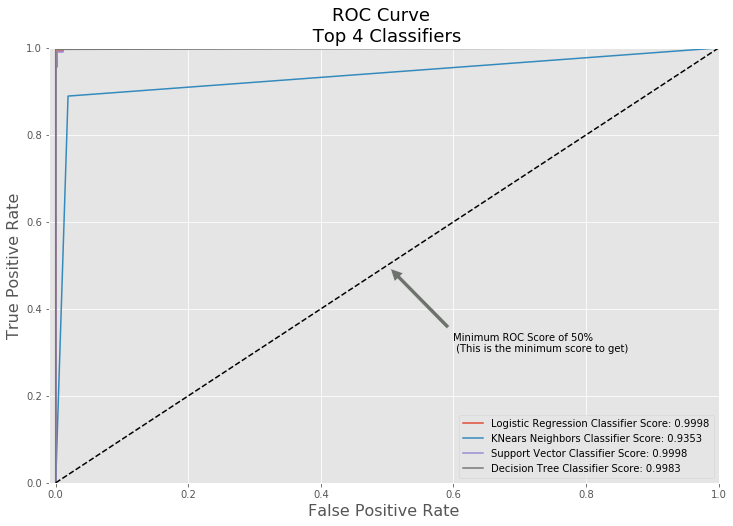

In [84]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## Conclusion on Undersampling

All these Models are performing very well on the undersampled data. However, as discussed above, undersampled data may lose a lot of information due dropping of observations of majority class. Thus, we cannot we completely sure if these results from these models are optimal. To solve this problem, we will work on oversampled dataset - SMOTE dataset